In [119]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
#from itertools import cycle, islice
import pandas as pd
import numpy as np

In [120]:
#Read Csv file
Rental_DF = pd.DataFrame(pd.read_csv("Toronto_apartment_rentals_2018.csv"))

In [121]:
Rental_DF.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,LatLong
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00","43.5816391,-79.648193"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00","43.6430505,-79.3916429"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00","43.6606054,-79.3786354"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00","43.6410868,-79.3814048"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00","43.6524873,-79.3896218"


In [122]:
# Convert Price column string value to float
Rental_DF["Price"] = Rental_DF["Price"].replace('[\$,]', '', regex=True).astype(float)
Rental_DF.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,LatLong
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0,"43.5816391,-79.648193"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0,"43.6430505,-79.3916429"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0,"43.6606054,-79.3786354"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0,"43.6410868,-79.3814048"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0,"43.6524873,-79.3896218"


In [123]:
#Read Csv file
Crime_DF = pd.DataFrame(pd.read_csv("MCI_2014_to_2018.csv"))
Crime_DF.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId,LatLong
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,...,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001,"43.6592293,-79.3851929"
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,...,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002,"43.7775917,-79.4253998"
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,...,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400,2003,"43.7775917,-79.4253998"
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,...,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373,2004,"43.8017273,-79.2103729"
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,...,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334,2005,"43.8358841,-79.2543335"


In [124]:
# Divide the Available Rental Properties as per price range
bins=[50.90,1000.90,2000.90,3000.90,4000.90,5000.90,10000.90,50000.90,600000.90]
group_name=["50-1000$","1001-2000$","2001-3000$","3001-4000$","4001-5000$","5001-10000$","10001-50000$","50001-600000$"]
Rental_DF["Price Range"] = pd.cut(Rental_DF["Price"],bins,labels=group_name)
groupAnalysis_ByRentalPrice = Rental_DF.groupby(['Price Range'])
Property_count=groupAnalysis_ByRentalPrice["Address"].count()
Rental_analysis=pd.DataFrame({"Total Rental Properties":Property_count})
Rental_analysis



,Total Rental Properties
Price Range,
50-1000$,41
1001-2000$,463
2001-3000$,511
3001-4000$,90
4001-5000$,11
5001-10000$,4
10001-50000$,1
50001-600000$,3


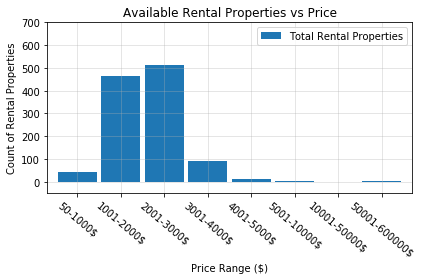

In [125]:
#Plot the bar graph for Rental properties by price range
Rental_analysis.plot.bar(width=.9)
# Orient widths. Add labels, tick marks, etc. 
plt.title("Available Rental Properties vs Price")
plt.xlabel("Price Range ($)")
plt.ylabel("Count of Rental Properties")
plt.ylim(-50,700)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [126]:
# Maximum Available Rental Properties and Price Range

Rental_Avl_Properties=pd.DataFrame(Rental_analysis.iloc[Rental_analysis["Total Rental Properties"].values.argmax()])
Rental_Avl_Properties

,2001-3000$
Total Rental Properties,511


In [127]:
# Top 5 Expensive Neighborhood 

data=Rental_DF[["Price","Address","Bedroom","Bathroom","Lat","Long"]]
Top_data=pd.DataFrame(data)
Top_data1=Top_data.sort_values("Price",ascending=False)
Top_data1.head()


,Price,Address,Bedroom,Bathroom,Lat,Long
238,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
129,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
371,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
917,36900.0,", TORONTO M4T 1P3 ON, Canada",2,1.0,43.690463,-79.381576
952,9750.0,"311 Bay St, Toronto, ON M5H 4G5, Canada",2,2.5,43.649783,-79.380440


In [128]:
# Top 5 Low Cost Neighborhood 

Low_data=Top_data.sort_values("Price")
Low_data.head()

,Price,Address,Bedroom,Bathroom,Lat,Long
816,65.0,"Euclid Ave, Toronto, ON, Canada",1,2.0,43.658689,-79.412577
973,99.0,"2121 Lake Shore Blvd W, Etobicoke, ON M8V 4E9,...",1,2.0,43.627447,-79.478374
794,99.0,"8 Wellesley St E, Toronto, ON M4Y 3B2, Canada",1,1.0,43.665233,-79.384293
761,150.0,", Toronro M4V 1N5 ON, Canada",1,1.0,43.686511,-79.399522
1110,300.0,"195 Wynford Dr, North York, ON M3C 3P3, Canada",1,1.0,43.723587,-79.324879


In [129]:
Crime_DF.columns


Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long', 'ObjectId', 'LatLong'],
      dtype='object')

In [130]:
Crime_Data=Crime_DF[['event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype','offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour','Neighbourhood', 'MCI','Division']]


In [131]:
# Crime Analysis by Majior Crime Indicator
Crime_Analysis = Crime_Data.groupby(['MCI'])
Count_Offence=Crime_Analysis["event_unique_id"].count()
Offence_data=pd.DataFrame({"Total Count of Offence":Count_Offence})
Offence_data


,Total Count of Offence
MCI,
Assault,90878
Auto Theft,18178
Break and Enter,34911
Robbery,18128
Theft Over,5430


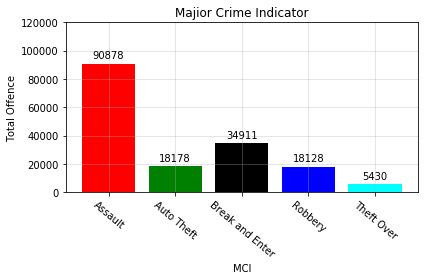

In [132]:
#Plot the bar graph for Majior Crime Indicator

x=["Assault","Auto Theft","Break and Enter","Robbery","Theft Over"]
fig, ax = plt.subplots()
rect1=ax.bar(x,Offence_data["Total Count of Offence"],color=[ 'red', 'green','black', 'blue', 'cyan'])

# Orient widths. Add labels, tick marks, etc. 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect1)
plt.title("Majior Crime Indicator")
plt.xlabel("MCI")
plt.ylabel("Total Offence")

#Lable Each Bar
plt.ylim(0,120000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [133]:
#Crime Analysis by year from 2000 to 2018
Crime_Analysis1 = Crime_Data.groupby(['occurrenceyear'])
Count_by_year=Crime_Analysis1["event_unique_id"].count()
CountByYear_Data=pd.DataFrame({"Total count of offence":Count_by_year})

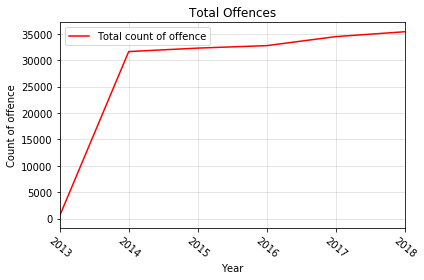

In [155]:
#Plot the line graph for Total offence by Year 2000 to 2018
#Year=["2012","2013","2014","2015","2016","2017","2018"]
CountByYear_Data.plot(color="red")

# Orient widths. Add labels, tick marks, etc. 
plt.title("Total Offences")
plt.xlabel("Year")
plt.ylabel("Count of offence")
plt.xlim(2013,2018)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [149]:
# Crime Analysis by Most Occurence of the week day
Crime_Analysis2 = Crime_Data.groupby(['occurrencedayofweek'])
CountByDay=Crime_Analysis2["event_unique_id"].count()
week=CountByDay[1]+CountByDay[4]+CountByDay[5]+CountByDay[6]
weekend=CountByDay[0]+CountByDay[2]+CountByDay[3]
OffenceByDay_data=pd.DataFrame({"Days":["Week day's","Weekend"],"Total Count of Offence":[week,weekend]})
OffenceByDay_data=OffenceByDay_data.set_index("Days")

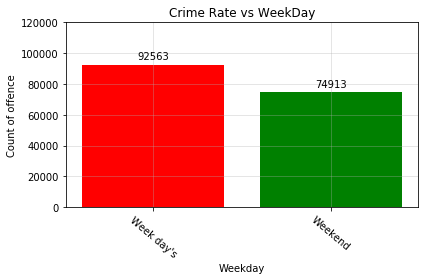

In [172]:
#Plot the Bar graph for Total offence by Weekday's
x=["Week day's","Weekend"]
fig, ax = plt.subplots()
bar1=ax.bar(x,OffenceByDay_data["Total Count of Offence"],color=[ 'red', 'green'])

# Orient widths. Add labels, tick marks, etc. 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
plt.title("Crime Rate vs WeekDay")
plt.xlabel("Weekday")
plt.ylabel("Count of offence")
plt.ylim(0,120000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [163]:
# Crime Analysis by season
Crime_Analysis3 = Crime_Data.groupby(['occurrencemonth'])
CountByMonth=Crime_Analysis3["event_unique_id"].count()
spring=CountByMonth[0]+CountByMonth[7]+CountByMonth[8]
summer=CountByMonth[6]+CountByMonth[5]+CountByMonth[1]
fall=CountByMonth[11]+CountByMonth[10]+CountByMonth[9]
winter=CountByMonth[2]+CountByMonth[3]+CountByMonth[4]
OffenceByMonth_data=pd.DataFrame({"Seasons ":["Spring","Summer","Fall","Winter"],"Total Count of Offence":[spring,summer,fall,winter]})
OffenceByMonth_data

,Seasons,Total Count of Offence
0,Spring,41043
1,Summer,43655
2,Fall,43975
3,Winter,38803


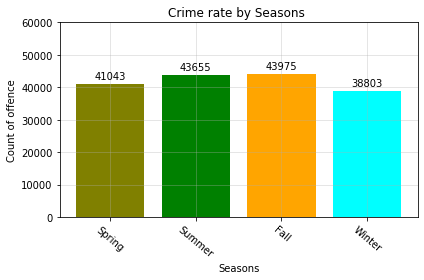

In [173]:
#Plot the Bar graph for Crime Rate by Month of the year
month=["Spring","Summer","Fall","Winter"]
fig, ax = plt.subplots()
bar2=ax.bar(month,OffenceByMonth_data["Total Count of Offence"],color=[ 'olive','green','orange','cyan'])

# Orient widths. Add labels, tick marks, etc. 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar2)
plt.title("Crime rate by Seasons ")
plt.xlabel("Seasons")
plt.ylabel("Count of offence")
plt.ylim(0,60000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [111]:
#Crime analysis by Neighborhood 
Rent=Rental_DF[["Price","Lat","Long"]]
Rent_d=pd.DataFrame(Rent)
crime=Crime_DF.loc[Crime_DF["occurrenceyear"]==2018,["event_unique_id","MCI","occurrenceyear","Neighbourhood"]]
crime_d=pd.DataFrame(crime)

In [112]:
Crime = crime_d.groupby(['Neighbourhood'])
Count_byA=Crime["event_unique_id"].count()
CountByA_Data=pd.DataFrame({"Total count of offence":Count_byA})
#CountByA_Data.head()

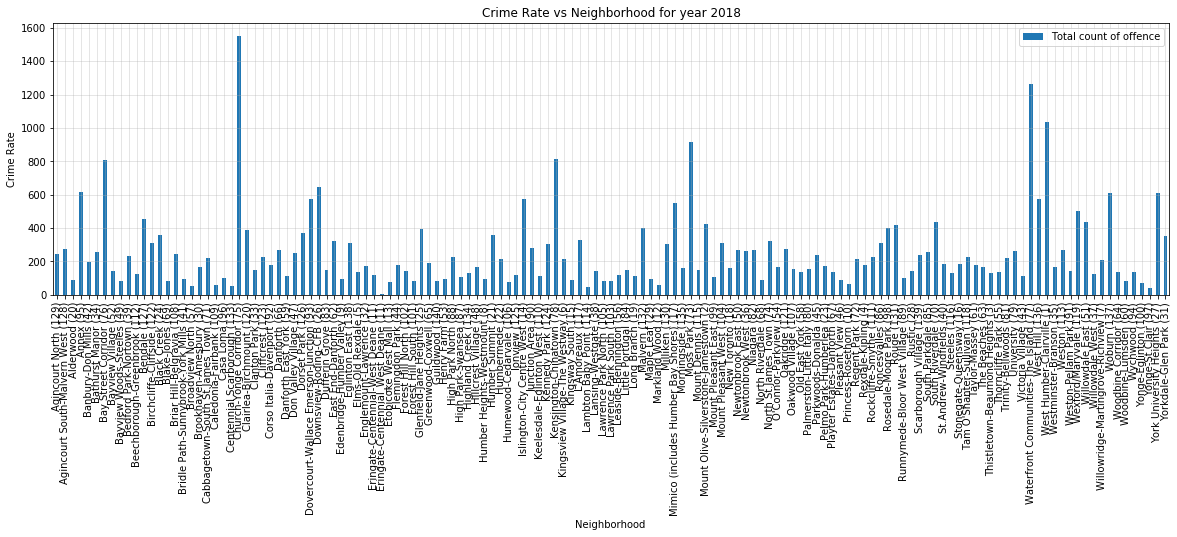

In [113]:
#Plot the Graph Crime Rate by Neghbourhood for Year 2018
CountByA_Data.plot.bar(figsize=(20,5))
# Orient widths. Add labels, tick marks, etc. 
plt.title("Crime Rate vs Neighborhood for year 2018")
plt.xlabel("Neighborhood ")
plt.ylabel("Crime Rate")
plt.grid(alpha = .4)


In [115]:
# Most Safe places to Rent as per crime rate in 2018

safe_Place=CountByA_Data.sort_values("Total count of offence")
safe_Place.head()

,Total count of offence
Neighbourhood,
Eringate-Centennial_West Deane (11),6
Yonge-St.Clair (97),41
Lambton Baby Point (114),44
Broadview North (57),50
Centennial Scarborough (133),52


In [118]:
# Most Unsafe places to Rent as per crime rate in 2018

unsafe_Place=CountByA_Data.sort_values("Total count of offence",ascending=False)
unsafe_Place.head()

,Total count of offence
Neighbourhood,
Church-Yonge Corridor (75),1552
Waterfront Communities-The Island (77),1266
West Humber-Clairville (1),1035
Moss Park (73),914
Kensington-Chinatown (78),815


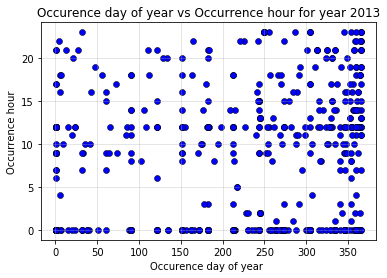

In [189]:
#Scatter plot Occurencedayofyear and occurencehour for one year
crime1=Crime_DF.loc[Crime_DF["occurrenceyear"]==2013,["occurrencedayofyear","occurrencehour"]]
crime_d1=pd.DataFrame(crime1)
plt.scatter(crime_d1["occurrencedayofyear"],crime_d1["occurrencehour"],linewidths = 0.5, edgecolors = 'black', color = 'blue')
# Orient widths. Add labels, tick marks, etc. 
plt.title("Occurence day of year vs Occurrence hour for year 2013")
plt.xlabel("Occurence day of year ")
plt.ylabel("Occurrence hour")
plt.grid(alpha = .4)

In [54]:
#Code to merge Two dataset without common key------------(optional)

Rent_d['tmp'] = 1
crime_d['tmp']=1
df = pd.merge(Rent_d, crime_d, on=['tmp'])
df = df.drop('tmp', axis=1)
#-----------------------------------------------------